<a href="https://www.kaggle.com/code/zer0ai/neural-networks-from-scratch?scriptVersionId=189277538" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Understanding Neural Networks: Building a Simple Neural Network from Scratch

In this notebook, we will dive deep into the workings of a simple neural network, creating one from scratch using Python and NumPy. We will explain each step and the underlying mathematics to ensure a thorough understanding of neural networks.

## Introduction

Neural networks are a fundamental component of modern machine learning and artificial intelligence. They are inspired by the human brain and consist of interconnected neurons that process data in a way that mimics biological neural networks. In this notebook, we will build a basic feedforward neural network and use it to solve a simple classification problem.

## Neural Network Architecture

Our neural network will have the following structure:
- **Input layer**: 2 neurons (for two features)
- **Hidden layer**: 3 neurons
- **Output layer**: 1 neuron (binary classification)

### Components of the Neural Network

1. **Weights and Biases**: These are the parameters the network learns during training.
2. **Activation Functions**: Functions that introduce non-linearity into the network.
3. **Forward Propagation**: The process of passing input data through the network to get predictions.
4. **Cost Function**: A function that measures the error of the predictions.
5. **Backward Propagation**: The process of updating the weights and biases to reduce the error.

## Step-by-Step Implementation

### Step 1: Import Necessary Libraries

We use NumPy for numerical computations.

In [1]:
import numpy as np

## Step 2: Initialize Parameters
We initialize weights and biases randomly. Small random values for weights prevent the network from starting with symmetrical values, which is crucial for learning.

In [2]:
# Step 2: Initialize Parameters
def initialize_parameters():
    # Seed the random number generator for reproducibility
    np.random.seed(1)
    # Initialize weights and biases for the first layer (3 neurons, 2 inputs)
    W1 = np.random.randn(3, 2) * 0.01
    b1 = np.zeros((3, 1))
    # Initialize weights and biases for the second layer (1 neuron, 3 inputs)
    W2 = np.random.randn(1, 3) * 0.01
    b2 = np.zeros((1, 1))
    return W1, b1, W2, b2

In [3]:
# Function to print the parameters in a pretty format (optional)
def print_parameters(W1, b1, W2, b2):
    print("W1 (weights for the first layer):")
    print(W1)
    print("\nb1 (biases for the first layer):")
    print(b1)
    print("\nW2 (weights for the second layer):")
    print(W2)
    print("\nb2 (biases for the second layer):")
    print(b2)

# Initialize parameters
W1, b1, W2, b2 = initialize_parameters()

# Print parameters in a pretty format
print_parameters(W1, b1, W2, b2)

W1 (weights for the first layer):
[[ 0.01624345 -0.00611756]
 [-0.00528172 -0.01072969]
 [ 0.00865408 -0.02301539]]

b1 (biases for the first layer):
[[0.]
 [0.]
 [0.]]

W2 (weights for the second layer):
[[ 0.01744812 -0.00761207  0.00319039]]

b2 (biases for the second layer):
[[0.]]


#### Explanation of Array Sizes

1. **Weights and Biases for the First Layer (Hidden Layer)**
   - **Weights (W1):** The weight matrix `W1` connects the input layer to the hidden layer. It has a shape of (3, 2) because there are 3 neurons in the hidden layer and each neuron connects to the 2 input features.
     - **Shape:** (number of neurons in the hidden layer, number of input features)
     - **Shape:** (3, 2)
   - **Biases (b1):** The bias vector `b1` is added to the weighted sum of inputs for each neuron in the hidden layer. It has a shape of (3, 1) because there are 3 neurons in the hidden layer, and each neuron has its own bias term.
     - **Shape:** (number of neurons in the hidden layer, 1)
     - **Shape:** (3, 1)
     
     
2. **Weights and Biases for the Second Layer (Output Layer)**
   - **Weights (W2):** The weight matrix `W2` connects the hidden layer to the output layer. It has a shape of (1, 3) because there is 1 neuron in the output layer, and it connects to the 3 neurons in the hidden layer.
     - **Shape:** (number of neurons in the output layer, number of neurons in the hidden layer)
     - **Shape:** (1, 3)
   - **Biases (b2):** The bias vector `b2` is added to the weighted sum of inputs for the neuron in the output layer. It has a shape of (1, 1) because there is 1 neuron in the output layer.
     - **Shape:** (number of neurons in the output layer, 1)
     - **Shape:** (1, 1)
     
      ![image](https://i.ibb.co/njJ0V78/ffnn8.png)

## Step 3: Activation Functions
We use the sigmoid function for the output layer and ReLU (Rectified Linear Unit) for the hidden layer.

Sigmoid Function:
$$ 
\sigma(Z) = \frac{1}{1 + e^{-Z}}
$$
ReLU Function
$$
\text{ReLU}(Z) = \max(0, Z)
$$
ReLU Derivative
$$
\text{ReLU}'(Z) = \begin{cases} 
0 & \text{if } Z \leq 0 \\
1 & \text{if } Z > 0 
\end{cases}
$$

In [4]:
def sigmoid(Z):
    return 1 / (1 + np.exp(-Z))

def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(Z):
    return Z > 0


## Plotting the Activation Functions (optional)
Let's visualize the Sigmoid, ReLU, and ReLU derivative functions using matplotlib. (Don't worry about this code just run it)

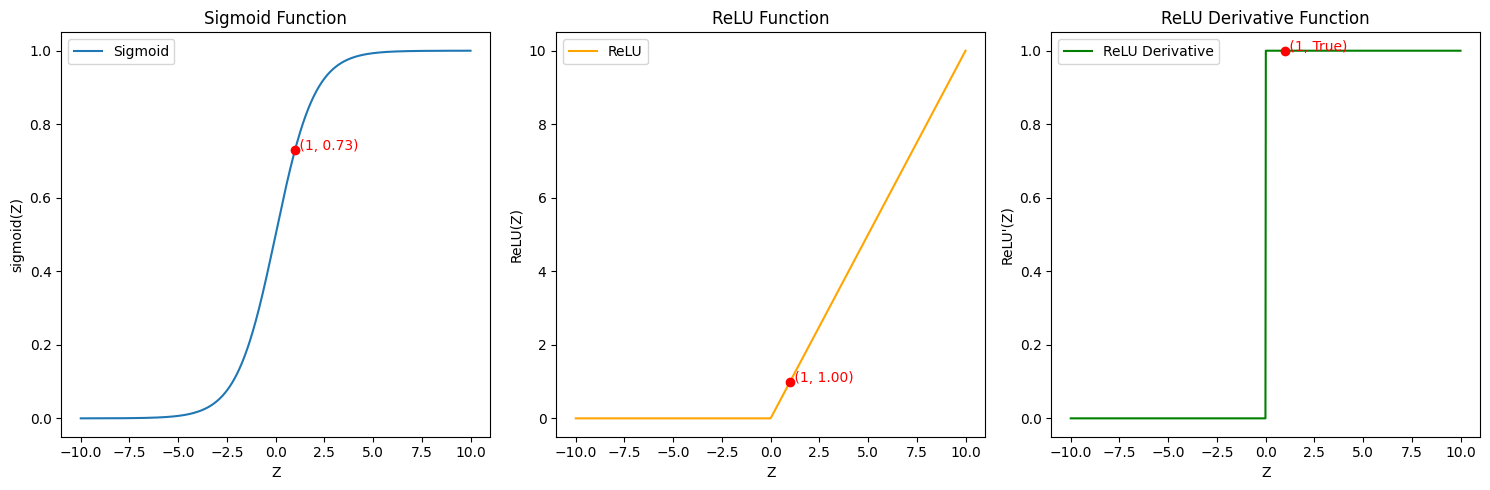

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of values for Z
Z = np.linspace(-10, 10, 1000)
example_value = 1

# Compute the values of the functions
sigmoid_values = sigmoid(Z)
relu_values = relu(Z)
relu_derivative_values = relu_derivative(Z)

# Compute the values for the example value
sigmoid_example = sigmoid(example_value)
relu_example = relu(example_value)
relu_derivative_example = relu_derivative(example_value)

# Plot Sigmoid function
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(Z, sigmoid_values, label="Sigmoid")
plt.scatter(example_value, sigmoid_example, color='red', zorder=5)
plt.text(example_value, sigmoid_example, f' ({example_value}, {sigmoid_example:.2f})', color='red')
plt.title("Sigmoid Function")
plt.xlabel("Z")
plt.ylabel("sigmoid(Z)")
plt.legend()

# Plot ReLU function
plt.subplot(1, 3, 2)
plt.plot(Z, relu_values, label="ReLU", color="orange")
plt.scatter(example_value, relu_example, color='red', zorder=5)
plt.text(example_value, relu_example, f' ({example_value}, {relu_example:.2f})', color='red')
plt.title("ReLU Function")
plt.xlabel("Z")
plt.ylabel("ReLU(Z)")
plt.legend()

# Plot ReLU derivative function
plt.subplot(1, 3, 3)
plt.plot(Z, relu_derivative_values, label="ReLU Derivative", color="green")
plt.scatter(example_value, relu_derivative_example, color='red', zorder=5)
plt.text(example_value, relu_derivative_example, f' ({example_value}, {relu_derivative_example})', color='red')
plt.title("ReLU Derivative Function")
plt.xlabel("Z")
plt.ylabel("ReLU'(Z)")
plt.legend()

plt.tight_layout()
plt.show()


In our example, we chose a specific value **Z=1** to illustrate the outputs of the Sigmoid, ReLU, and ReLU derivative functions. 
#### Sigmoid Function
$$
\sigma(1) = \frac{1}{1 + e^{-1}} \approx 0.73
$$
#### ReLU Function
$$
\text{ReLU}(1) = \max(0, 1) = 1
$$
#### ReLU Derivative
$$
\text{ReLU}'(1) = 1
$$

## Step 4: Forward Propagation
Forward propagation involves passing the input data through the network to obtain the output.

In [6]:
# Step 4: Forward Propagation
def forward_propagation(X, W1, b1, W2, b2):
    # Compute linear combination for first layer
    Z1 = np.dot(W1, X) + b1
    # Apply ReLU activation function
    A1 = relu(Z1)
    # Compute linear combination for second layer
    Z2 = np.dot(W2, A1) + b2
    # Apply sigmoid activation function
    A2 = sigmoid(Z2)
    return Z1, A1, Z2, A2




## Forward Propagation Mathematical Explanation

Forward propagation involves passing the input data through the network to obtain the output.

- **Input to Hidden Layer:**
  
  The input to the hidden layer \( Z1 \) is computed as:
  
  $$
  Z1 = W1 \cdot X + b1
  $$
  
  where:
  - \( W1 \) is the weight matrix for the first layer.
  - \( X \) is the input feature matrix.
  - \( b1 \) is the bias vector for the first layer.

- **Activation of Hidden Layer:**
  
  The activation \( A1 \) of the hidden layer is obtained by applying the ReLU activation function:
  
  $$
  A1 = \text{ReLU}(Z1)
  $$
  
  where:
  - ReLU(Z1) = max(0, Z1)

- **Hidden to Output Layer:**
  
  The hidden to the output layer \( Z2 \) is computed as:
  
  $$
  Z2 = W2 \cdot A1 + b2
  $$
  
  where:
  - \( W2 \) is the weight matrix for the second layer.
  - \( A1 \) is the activation from the hidden layer.
  - \( b2 \) is the bias vector for the second layer.

- **Activation of Output Layer:**
  
  The activation \( A2 \) of the output layer is obtained by applying the sigmoid activation function:
  
  $$
  A2 = \sigma(Z2)
  $$
  
  where:
  $$
   \sigma(Z2) = \frac{1}{1 + e^{-Z2}}
  $$

![image](https://i.ibb.co/vmfZ5Fw/ffnn6.png)

## Step 5: Compute Cost
The cost function measures how well the network's predictions match the actual labels. We use the binary cross-entropy loss function.

In [7]:
# Step 5: Compute Cost
def compute_cost(A2, Y):
    # Number of examples
    m = Y.shape[1]
    # Compute binary cross-entropy cost
    cost = -1/m * np.sum(Y * np.log(A2) + (1 - Y) * np.log(1 - A2))
    return np.squeeze(cost)

### Cost Function Mathematical Explanation

The cost function measures how well the neural network's predictions match the actual labels. It helps us quantify the error of the model, which we want to minimize during training. In our case, we use the **binary cross-entropy loss function** because we are dealing with a binary classification problem.

The cost function $J$ is defined as:

$$
J = -\frac{1}{m} \sum_{i=1}^{m} \left[ Y^{(i)} \log(A2^{(i)}) + (1 - Y^{(i)}) \log(1 - A2^{(i)}) \right]
$$

Let's break this down step by step:

#### Components of the Equation

1. **$m$ (Number of examples):**
   - $m$ is the total number of examples in the dataset. It is used to calculate the average error over all examples.

2. **Summation ($\sum_{i=1}^{m}$):**
   - The summation symbol $\sum_{i=1}^{m}$ indicates that we are summing the errors for all examples from $i=1$ to $i=m$.

3. **Actual Labels ($Y^{(i)}$):**
   - $Y^{(i)}$ represents the actual label for the $i$-th example. It can be either 0 or 1 in a binary classification problem.

4. **Predicted Probabilities ($A2^{(i)}$):**
   - $A2^{(i)}$ represents the predicted probability for the $i$-th example. It is the output of the neural network's sigmoid activation function, which gives a value between 0 and 1.

#### Error Calculation for Each Example

For each example, the cost function calculates the error using the following terms:

1. **When the actual label is 1 ($Y^{(i)} = 1$):**
   - The term $Y^{(i)} \log(A2^{(i)})$ is used.
   - If $Y^{(i)} = 1$, this term becomes $\log(A2^{(i)})$ because the $(1 - Y^{(i)}) \log(1 - A2^{(i)})$ term drops out:
     $$
     -\frac{1}{m} \sum_{i=1}^{m} \left[ \log(A2^{(i)}) \right]
     $$
   - $\log(A2^{(i)})$ measures how close the predicted probability $A2^{(i)}$ is to 1. If $A2^{(i)}$ is close to 1, the error is small (log of a number close to 1 is close to 0). If $A2^{(i)}$ is far from 1, the error is large (log of a number close to 0 is a large negative number, and the negative sign makes it a large positive number).

2. **When the actual label is 0 ($Y^{(i)} = 0$):**
   - The term $(1 - Y^{(i)}) \log(1 - A2^{(i)})$ is used.
   - If $Y^{(i)} = 0$, this term becomes $\log(1 - A2^{(i)})$ because the $Y^{(i)} \log(A2^{(i)})$ term drops out:
     $$
     -\frac{1}{m} \sum_{i=1}^{m} \left[ \log(1 - A2^{(i)}) \right]
     $$
   - $\log(1 - A2^{(i)})$ measures how close the predicted probability $1 - A2^{(i)}$ is to 1. If $A2^{(i)}$ is close to 0, then $1 - A2^{(i)}$ is close to 1, making the error small. If $A2^{(i)}$ is far from 0, the error is large.

#### Combining the Errors

The total error for all examples is calculated by summing the individual errors and averaging them:

$$
J = -\frac{1}{m} \sum_{i=1}^{m} \left[ Y^{(i)} \log(A2^{(i)}) + (1 - Y^{(i)}) \log(1 - A2^{(i)}) \right]
$$

- The negative sign ensures that the cost function produces a positive value, as logs of values between 0 and 1 are negative.
- Dividing by $m$ averages the total error over all examples, giving us the average cost.

#### Simplified Explanation

- $Y^{(i)} \log(A2^{(i)})$: If the actual label $Y^{(i)}$ is 1, this term measures the error between the actual label and the predicted probability $A2^{(i)}$.
- $(1 - Y^{(i)}) \log(1 - A2^{(i)})$: If the actual label $Y^{(i)}$ is 0, this term measures the error between the actual label and the predicted probability $1 - A2^{(i)}$.

By summing these errors for all examples and taking the average, we get the overall cost $J$. The goal of training the neural network is to adjust the weights and biases to minimize this cost, thus improving the model's predictions.


## Step 6: Backward Propagation
Backward propagation updates the weights and biases to minimize the cost function. It involves calculating the gradient of the cost function with respect to each parameter.

In [8]:
# Step 6: Backward Propagation
def backward_propagation(X, Y, Z1, A1, A2, W2):
    # Number of examples
    m = X.shape[1]
    
    # Compute gradient of cost with respect to Z2
    dZ2 = A2 - Y
    # Compute gradient of cost with respect to W2
    dW2 = 1/m * np.dot(dZ2, A1.T)
    # Compute gradient of cost with respect to b2
    db2 = 1/m * np.sum(dZ2, axis=1, keepdims=True)
    
    # Compute gradient of cost with respect to A1
    dA1 = np.dot(W2.T, dZ2)
    # Compute gradient of cost with respect to Z1 using ReLU derivative
    dZ1 = dA1 * relu_derivative(Z1)
    # Compute gradient of cost with respect to W1
    dW1 = 1/m * np.dot(dZ1, X.T)
    # Compute gradient of cost with respect to b1
    db1 = 1/m * np.sum(dZ1, axis=1, keepdims=True)
    
    return dW1, db1, dW2, db2


### Backward Propagation

Backward propagation, or backpropagation, is the process of calculating the gradient of the cost function with respect to the neural network's parameters (weights and biases) in order to update them and minimize the cost. Let's break down the steps involved:

#### Step-by-Step Explanation

1. **Output Layer Error (dZ2)**

   First, we calculate the error at the output layer. This is the difference between the predicted output \( A2 \) and the actual label \( Y \).

   $$
   dZ2 = A2 - Y
   $$

2. **Gradient of Cost with respect to W2 (dW2)**

   Next, we calculate the gradient of the cost with respect to the weights of the second layer (W2). This is done by multiplying the error \( dZ2 \) by the transpose of the activations from the hidden layer \( A1 \), and then averaging over all examples.

   $$
   dW2 = \frac{1}{m} \cdot dZ2 \cdot A1^T
   $$

3. **Gradient of Cost with respect to b2 (db2)**

   We then calculate the gradient of the cost with respect to the biases of the second layer (b2). This is the average of the error \( dZ2 \) over all examples.

   $$
   db2 = \frac{1}{m} \sum dZ2
   $$

4. **Propagate Error to Hidden Layer (dA1)**

   The error needs to be propagated back to the hidden layer. This is done by multiplying the transpose of W2 with the error \( dZ2 \).

   $$
   dA1 = W2^T \cdot dZ2
   $$

5. **Error at Hidden Layer (dZ1)**

   We then calculate the error at the hidden layer. This is done by element-wise multiplying \( dA1 \) with the derivative of the ReLU activation function applied to \( Z1 \). The derivative of ReLU is 1 for positive values and 0 for non-positive values.

   $$
   dZ1 = dA1 \cdot \text{ReLU}'(Z1)
   $$

   where:

   $$
   \text{ReLU}'(Z1) = \begin{cases} 
   0 & \text{if } Z1 \leq 0 \\
   1 & \text{if } Z1 > 0 
   \end{cases}
   $$

6. **Gradient of Cost with respect to W1 (dW1)**

   We then calculate the gradient of the cost with respect to the weights of the first layer (W1). This is done by multiplying the error \( dZ1 \) by the transpose of the input \( X \), and then averaging over all examples.

   $$
   dW1 = \frac{1}{m} \cdot dZ1 \cdot X^T
   $$

7. **Gradient of Cost with respect to b1 (db1)**

   Finally, we calculate the gradient of the cost with respect to the biases of the first layer (b1). This is the average of the error \( dZ1 \) over all examples.

   $$
   db1 = \frac{1}{m} \sum dZ1
   $$

#### Summary of Gradients

To summarize, the gradients for updating the parameters are:

- $  dW2 = \frac{1}{m} \cdot dZ2 \cdot A1^T  $
- $ db2 = \frac{1}{m} \sum dZ2 $
- $ dA1 = W2^T \cdot dZ2 $
- $ dZ1 = dA1 \cdot \text{ReLU}'(Z1) $
- $ dW1 = \frac{1}{m} \cdot dZ1 \cdot X^T $
- $ db1 = \frac{1}{m} \sum dZ1 $

By using these gradients, we can adjust the weights and biases to minimize the cost function, improving the neural network's performance.

The backward propagation process involves:
1. Calculating the error at the output.
2. Propagating this error backward through the network, layer by layer.
3. Computing the gradients of the cost function with respect to each parameter.
4. Using these gradients to update the parameters.

This process is repeated iteratively during training to optimize the neural network.


## Step 7: Update Parameters
We update the weights and biases using gradient descent.

In [9]:
# Step 7: Update Parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    # Update weights and biases for the first layer
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    # Update weights and biases for the second layer
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

### Update Parameters

After computing the gradients during backward propagation, we use these gradients to update the neural network's parameters (weights and biases) in order to minimize the cost function. This process is called **gradient descent**.

#### What is Gradient Descent?

Gradient descent is an optimization algorithm used to minimize the cost function. It works by adjusting the parameters in the opposite direction of the gradient of the cost function with respect to those parameters. The size of the step we take in each iteration is determined by the **learning rate**.

#### Step-by-Step Explanation

1. **Current Parameters**

   Let's say we have the current values of the weights and biases:
   - $ W1 $: weights for the first layer
   - $ b1 $: biases for the first layer
   - $ W2 $: weights for the second layer
   - $ b2 $: biases for the second layer

2. **Gradients**

   From backward propagation, we have calculated the gradients of the cost function with respect to each parameter:
   - $ dW1 $: gradient of the cost with respect to $ W1 $
   - $ db1 $: gradient of the cost with respect to $ b1 $
   - $ dW2 $: gradient of the cost with respect to $ W2 $
   - $ db2 $: gradient of the cost with respect to $ b2 $

3. **Learning Rate**

   The learning rate, denoted by $ \alpha $, is a small positive number that controls the step size of the update. It's a hyperparameter that you need to set before training the model.

4. **Updating the Parameters**

   To update the parameters, we subtract the gradient multiplied by the learning rate from the current values of the parameters. This is done as follows:

   - **Updating $ W1 $:**
   
     $$
     W1 = W1 - \alpha \cdot dW1
     $$
     
     This means we adjust $ W1 $ by subtracting $ \alpha \cdot dW1 $ from it.

   - **Updating $ b1 $:**
   
     $$
     b1 = b1 - \alpha \cdot db1
     $$
     
     This means we adjust $ b1 $ by subtracting $ \alpha \cdot db1 $ from it.

   - **Updating $ W2 $:**
   
     $$
     W2 = W2 - \alpha \cdot dW2
     $$
     
     This means we adjust $ W2 $ by subtracting $ \alpha \cdot dW2 $ from it.

   - **Updating $ b2 $:**
   
     $$
     b2 = b2 - \alpha \cdot db2
     $$
     
     This means we adjust $ b2 $ by subtracting $ \alpha \cdot db2 $ from it.


- **Gradient Descent**: An optimization algorithm used to minimize the cost function by adjusting the parameters in the opposite direction of the gradient.
- **Learning Rate ($ \alpha $)**: A small positive number that controls the step size of the update.
- **Parameter Update Equations**: Adjust the weights and biases by subtracting the gradient multiplied by the learning rate from the current values.


## Step 8: Train the Neural Network
We train the neural network by repeatedly performing forward and backward propagation and updating the parameters.

In [10]:
# Step 8: Train the Neural Network
def model(X, Y, learning_rate=0.01, num_iterations=10000):
    # Initialize parameters
    W1, b1, W2, b2 = initialize_parameters()
    
    # Gradient descent loop
    for i in range(num_iterations):
        # Forward propagation
        Z1, A1, Z2, A2 = forward_propagation(X, W1, b1, W2, b2)
        # Compute cost
        cost = compute_cost(A2, Y)
        # Backward propagation
        dW1, db1, dW2, db2 = backward_propagation(X, Y, Z1, A1, A2, W2)
        # Update parameters
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        
        # Print cost every 1000 iterations
        if i % 1000 == 0:
            print(f"Cost after iteration {i}: {cost}")
    
    return W1, b1, W2, b2

#### Key steps:

1. **Initialize Parameters**

   Before training begins, we initialize the weights and biases with small random values. This step ensures that the network starts with a set of initial parameters.

2. **Forward Propagation**

   In each iteration, we pass the input data through the network (from input layer to output layer) to get the predicted output. This step is called forward propagation.

3. **Compute Cost**

   After obtaining the predicted output, we calculate the cost (or error) using the cost function. The cost function measures how far the predicted output is from the actual labels.

4. **Backward Propagation**

   Next, we perform backward propagation to calculate the gradients of the cost function with respect to each parameter. These gradients tell us how to adjust the parameters to reduce the cost.

5. **Update Parameters**

   Using the gradients calculated in the backward propagation step, we update the weights and biases by moving them in the direction that reduces the cost. This step is done using gradient descent.

6. **Repeat for Multiple Iterations**

   We repeat the forward propagation, compute cost, backward propagation, and update parameters steps for many iterations (or epochs). With each iteration, the network's parameters are adjusted, and the cost is reduced.

7. **Convergence**

   Over many iterations, the cost function value will decrease, indicating that the network is learning. The training process continues until the cost converges to a minimum value or a specified number of iterations is reached.


## Step 9: Make Predictions
After training, we can use the learned parameters to make predictions on new data.

In [11]:
# Step 9: Make Predictions
def predict(X, W1, b1, W2, b2):
    # Forward propagation
    _, _, _, A2 = forward_propagation(X, W1, b1, W2, b2)
    # Convert probabilities to binary predictions
    predictions = (A2 > 0.5)
    return predictions

In [12]:
# Step 10: Evaluate the Model
def evaluate_model(X, Y, W1, b1, W2, b2):
    predictions = predict(X, W1, b1, W2, b2)
    accuracy = np.mean(predictions == Y) * 100
    return accuracy

Cost after iteration 0: 0.6930747698129739
Cost after iteration 1000: 0.2928845422578445
Cost after iteration 2000: 0.29055221322017305
Cost after iteration 3000: 0.29032190408531333
Cost after iteration 4000: 0.2902431080503631
Cost after iteration 5000: 0.29021464951863846
Cost after iteration 6000: 0.29020564586916403
Cost after iteration 7000: 0.29019780406712165
Cost after iteration 8000: 0.2901907787311149
Cost after iteration 9000: 0.29018445571128954
Model accuracy: 85.00%


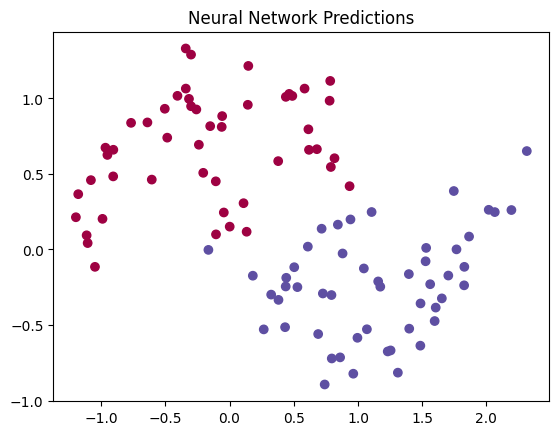

In [13]:
from sklearn.datasets import make_moons

# Example Usage
# Create a dataset
X, Y = make_moons(n_samples=100, noise=0.2)
X = X.T
Y = Y.reshape(1, Y.shape[0])

# Train the model
W1, b1, W2, b2 = model(X, Y, learning_rate=0.1, num_iterations=10000)

# Predict
predictions = predict(X, W1, b1, W2, b2)

# Evaluate the model
accuracy = evaluate_model(X, Y, W1, b1, W2, b2)
print(f"Model accuracy: {accuracy:.2f}%")

# Plot the results
plt.scatter(X[0, :], X[1, :], c=predictions, cmap=plt.cm.Spectral)
plt.title("Neural Network Predictions")
plt.show()